# Data Acquisition and Initial Exploration

**Objective**: Acquire resume dataset and perform initial exploratory data analysis

## Dataset Sources
- Primary: Kaggle Resume Dataset
- We'll download and explore a publicly available resume dataset
- Identify gaps that need synthetic data augmentation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Data Acquisition

For this project, we'll use a publicly available resume dataset. You can download one from:
- Kaggle: "UpdatedResumeDataSet.csv" or similar
- Alternative: "Resume Dataset" from various sources

**Instructions**:
1. Download the dataset from Kaggle
2. Place it in `ml/data/raw/` folder
3. Update the file path below

In [6]:
# Load the dataset
# TODO: Update the path to your downloaded dataset
data_path = '../data/raw/resume_dataset.csv'

# Try different encodings if needed
try:
    df = pd.read_csv(data_path)
except UnicodeDecodeError:
    df = pd.read_csv(data_path, encoding='latin-1')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (2484, 4)


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


## 2. Initial Data Exploration

In [7]:
# Basic information
print("Dataset Info:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Column Names:")
print(df.columns.tolist())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB

Column Names:
['ID', 'Resume_str', 'Resume_html', 'Category']


In [8]:
# Statistical summary
print("Statistical Summary:")
df.describe(include='all')

Statistical Summary:


,ID,Resume_str,Resume_html,Category
count,2.484000e+03,2484,2484,2484
unique,NaN,2482,2482,24
top,NaN,STOREKEEPER II Professional Sum...,"<div class=""fontsize fontface vmargins hmargin...",INFORMATION-TECHNOLOGY
freq,NaN,2,2,120
mean,3.182616e+07,NaN,NaN,NaN
std,2.145735e+07,NaN,NaN,NaN
min,3.547447e+06,NaN,NaN,NaN
25%,1.754430e+07,NaN,NaN,NaN
50%,2.521031e+07,NaN,NaN,NaN
75%,3.611444e+07,NaN,NaN,NaN


In [9]:
# Check for missing values
print("Missing Values:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

Missing Values:
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []


In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")


Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [11]:
# Visualize missing data
if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=missing_data, x='Missing_Percentage', y='Column', palette='viridis')
    plt.title('Missing Data by Column (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Percentage Missing')
    plt.tight_layout()
    plt.show()
else:
    print("No missing data found!")

No missing data found!


## 3. Data Quality Assessment

We'll assess:
- Data types correctness
- Text quality (resume content)
- Category distribution
- Potential issues for cleaning

In [12]:
# Examine text columns (resume content)
# Assuming there's a column with resume text - adjust column name as needed
text_columns = df.select_dtypes(include=['object']).columns
print(f"Text columns found: {text_columns.tolist()}")

# Sample some resume text
if len(text_columns) > 0:
    resume_col = text_columns[0]  # Adjust if needed
    print(f"\nSample from '{resume_col}' column:")
    print("="*50)
    print(df[resume_col].iloc[0][:500])  # First 500 characters

Text columns found: ['Resume_str', 'Resume_html', 'Category']

Sample from 'Resume_str' column:
         HR ADMINISTRATOR/MARKETING ASSOCIATE

HR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-task



Value counts for 'Category':
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


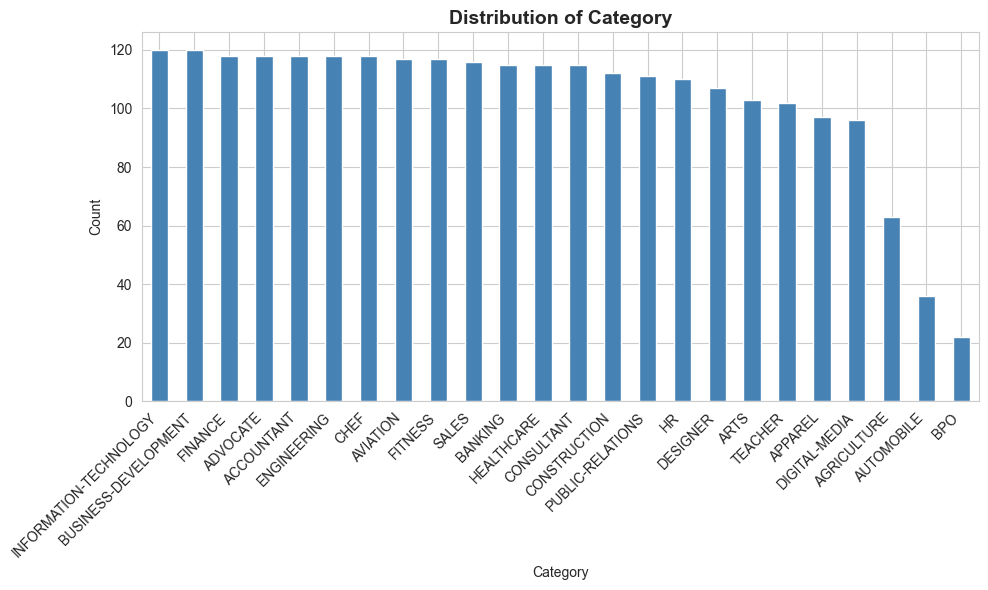

In [13]:
# If there's a category column (job role, department, etc.)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].nunique() < 50:  # Only for columns with reasonable number of categories
        print(f"\nValue counts for '{col}':")
        print(df[col].value_counts())
        
        # Visualize
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar', color='steelblue')
        plt.title(f'Distribution of {col}', fontsize=14, fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## 4. Initial Findings and Next Steps

Based on the exploration above, document:
1. **Data Quality Issues Identified**
2. **Required Cleaning Steps**
3. **Features Available**
4. **Gaps for Synthetic Data**

In [14]:
# Summary statistics
print("Dataset Summary:")
print("="*50)
print(f"Total Records: {len(df)}")
print(f"Total Features: {df.shape[1]}")
print(f"Missing Data: {df.isnull().sum().sum()} cells")
print(f"Duplicate Rows: {df.duplicated().sum()}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Summary:
Total Records: 2484
Total Features: 4
Missing Data: 0 cells
Duplicate Rows: 0
Memory Usage: 126.98 MB


## Save Checkpoint

Save initial findings for documentation

In [15]:
# Create a summary report
summary = {
    'total_records': len(df),
    'total_features': df.shape[1],
    'columns': df.columns.tolist(),
    'missing_values': df.isnull().sum().to_dict(),
    'duplicates': df.duplicated().sum()
}

print("\nExploration complete! Ready for data cleaning and preprocessing.")


Exploration complete! Ready for data cleaning and preprocessing.
